# On Decision Trees

## Objectives

- Use sklearn DecisionTreeClassifier for classification problem.

- Learn how we can use Gini-Entropy measures for measuring the pureness of a node.

- Pros and cons of the decision trees.

- explore the fine-tuning options in `sklearn` for decision trees



<img src = 'img/tree.jpeg' height = 250>

The key tool of decision trees is that some features provide more _information_ than others when trying to make a decision.<br>
And we rank features in the hierarchy based on how useful they are.

## Introduction


__Example 1__

<img src = 'img/statsQuest.png' width =550>

__Example 2__

<img src = 'img/appetite.png' width = 550/>

__Example 3__

<img src = 'img/complicated_tree.png' width=550/>

Your cousin is invited to a party and he is in love with Will Miley. Here is his decision tree for the party.

![party](img/party.png)

( image from this [site](https://chunml.github.io/ChunML.github.io/tutorial/Decision-Tree/) )

### Vocabulary: nodes

![nodes](img/terminology1.png)

### Vocabulary: splits & branches

![split](img/terminology2.png)

### Example 4: with data

Suppose we're working on a classification algorithm designed to **sort customers into two classes: those who pay their sales bills and those who don't**.

Each row in my dataframe represents a customer, and I have many predictors (columns) in my dataframe, including:

- salary
- total_bill
- club_member (boolean)
- years_post-sec_ed

Let's look at a simple set of data. **The 'paid' column is our target or dependent variable.**

In [6]:
import pandas as pd
custs = pd.DataFrame([[45000, 1000, True, 2, False], [70000, 100, True, 10, True],
             [30000, 2000, False, 0, False], [90000, 500, True, 2, True],
             [70000, 200, True, 5, False]],
            columns=['salary', 'total_bill', 'club_member', 'years_post-sec_ed',
                    'paid'])


In [7]:
custs

,salary,total_bill,club_member,years_post-sec_ed,paid
0,45000,1000,True,2,False
1,70000,100,True,10,True
2,30000,2000,False,0,False
3,90000,500,True,2,True
4,70000,200,True,5,False


## Partitioning

I partition my data by asking a question about the independent variables. The goal is to ask the right questions in the right order so that the resultant groups are "pure" with respect to the dependent variable. More on this below!


### Let's explore some variables below:

In [3]:
test = custs.sort_values(['salary'])
test

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


### Is the customer a club member?

This would divide my data into two groups:

- Group 1:

data points: 0, 1, 3, 4 (dep. var.: False, True, True, False)

- Group 2:

data points: 2 (dep. var.: False)

While I've isolated one of the customers who haven't paid in the second group, the first group is an even mix of payers and non-payers. So this split is not particularly good.

Would a different question split our data more effectively? Let's try:

### "Is the customer's salary less than $60k?"

This would divide my data into two groups:

- Group 1:

data points: 0, 2 (dep. var.: False, False)

-  Group 2:

data points: 1, 3, 4 (dep. var.: True, True, False)

## Which feature is more accurate in predicting whether and individual pays their bill?

This does a better job of partitioning my data according to the values of the dependent variable: The first group contains only customers who have not paid their bills, and the second group contains only one customer who has not paid her bill.

So a (very simple!) model that predicts:

(i) that customers who make less than $60k *won't* pay their bill, and

(ii) that customers who make $60k or more *will* pay their bill

would perform fairly well.

But how would my partition be *best* split? And how do I really know that the second split is better than the first? Can I do better than intuition here?

[Now watch this video from 3:30 - 10-10](https://www.youtube.com/watch?v=7VeUPuFGJHk)

## Entropy and Information Gain

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

The entropy of the whole dataset is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group.

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

To repeat, in the present case we have only two groups of interest: the payers (2/5) and the non-payers (3/5).

So our entropy for this toy dataset is:

$-0.4*\log_2(0.4) -0.6*\log_2(0.6)$.

Let's use the ```math``` library to calculate this:

In [4]:
from math import log

# Your code here!

ent_whole = -.4*log(.4,2)-0.6*log(.6,2)
ent_whole

0.9709505944546686

In [5]:
## we are calculating the entropy of a box with p_0 = 1/3, p_1 = 2/3

ent = -((1/3)*log((1/3),2) + (2/3)*log((2/3), 2))

ent

0.9182958340544896

That's pretty disordered!

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups. Let's calculate the entropy of the split produced by our question above about salary:

Group 1:

$E_{g1} = 0 * \log_2(0) - 1 * \log_2(1) = 0$. This is a pure group! The probability of being a payer in Group 1 is 0 and the probability of being a non-payer in Group 1 is 1.

Group 2:

$E_{g2} = \frac{2}{3} * \log_2\left(\frac{2}{3}\right) - \frac{1}{3} * \log_2\left(\frac{1}{3}\right)$.

Once again, using ```math```:

In [6]:
# Your code here!

ent_grp2 = -(2/3)*log(2/3,2)-1/3*log(1/3,2)
ent_grp2

0.9182958340544896

To get the whole entropy for this split, we'll do a weighted sum of the two group entropies:

In [7]:
# Your code here!

(2/5)*0 + (3/5)*ent_grp2

0.5509775004326937

For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. to look at the entropies of all possible splits, and
2. to choose the split with the lowest entropy.

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

## Gini Impurity

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_i p_i^2$,

where, again, $p_i$ is the probability of belonging to the $i$th group.

**Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.**

Exercise: Calculate the Gini Impurity for our toy dataset above.

In [8]:
# Your code here!

#### Gini Index

<img src= "../day-8-Decision_tree_regressors/img_murat/gini.png" style="height:100px">

#### Shannon's Entropy

<img src= "../day-8-Decision_tree_regressors/img_murat/entropy.png" style="height:100px">

<img src= "../day-8-Decision_tree_regressors/img_murat/gini_classification_entropy.png" style="height:400px">


## Coding Trees in Python

Scikit-learn has a tree module, which houses both a DecisionTreeClassifier and a DecisionTreeRegressor. The difference, as is probably clear by now, is that the former is for classification problems (discrete target) and the latter is for regression problems (continuous target). Let's use the classifier.

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [14]:
clf = DecisionTreeClassifier()

In [15]:
custs.head()

,salary,total_bill,club_member,years_post-sec_ed,paid
0,45000,1000,True,2,False
1,70000,100,True,10,True
2,30000,2000,False,0,False
3,90000,500,True,2,True
4,70000,200,True,5,False


In [16]:
X = custs[['salary', 'total_bill', 'club_member', 'years_post-sec_ed']]

y = custs.paid

In [17]:

clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn import tree

%matplotlib inline

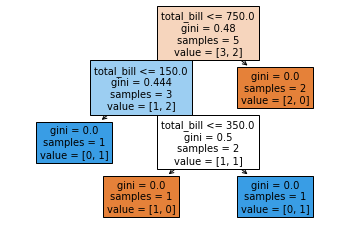

In [25]:
tree.plot_tree(clf.fit(custs.drop('paid', axis=1), custs['paid']),
               feature_names= ['salary', 'total_bill', 'club_member', 'years_post-sec_ed'],
               filled = True );

In [32]:
ct = DecisionTreeClassifier(max_depth=8) # Check out all the
                              # hyperparameter options here!

# dt_mod = ct.fit(custs.drop('paid', axis=1), custs['paid'])
# dt_mod.score(custs.drop('paid', axis=1), custs['paid'])

In [33]:
from sklearn import tree

%matplotlib inline

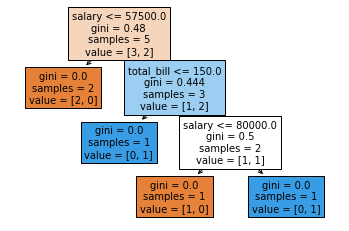

In [34]:
tree.plot_tree(ct.fit(custs.drop('paid', axis=1), custs['paid']),
               feature_names= ['salary', 'total_bill', 'club_member', 'years_post-sec_ed'],
               filled = True );

In [35]:
custs.columns

Index(['salary', 'total_bill', 'club_member', 'years_post-sec_ed', 'paid'], dtype='object')

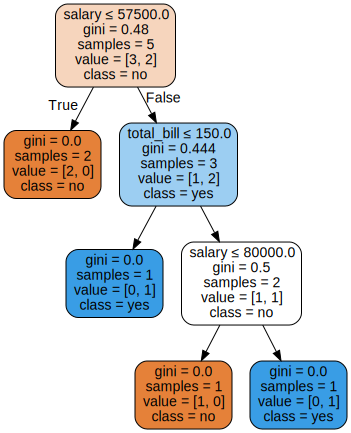

In [36]:
import graphviz 
dot_data = tree.export_graphviz(ct, out_file=None, feature_names= ['salary', 
                                                                   'total_bill', 
                                                                   'club_member',
                                                                   'years_post-sec_ed'],
                     class_names=['no', 'yes'],
                        filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data) 
graph

In [37]:
features = custs.columns.tolist()
features.remove('paid')
features

['salary', 'total_bill', 'club_member', 'years_post-sec_ed']

In [38]:
from sklearn.tree.export import export_text

r = export_text(ct, feature_names= features)
print(r)

|--- salary <= 57500.00
|   |--- class: False
|--- salary >  57500.00
|   |--- total_bill <= 150.00
|   |   |--- class: True
|   |--- total_bill >  150.00
|   |   |--- salary <= 80000.00
|   |   |   |--- class: False
|   |   |--- salary >  80000.00
|   |   |   |--- class: True



In [39]:
ct.tree_.node_count

7

In [40]:
import numpy as np

In [41]:
n_nodes = ct.tree_.node_count
children_left = ct.tree_.children_left
children_right = ct.tree_.children_right
feature = ct.tree_.feature
threshold = ct.tree_.threshold

# This code courtesy of sklearn:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 57500.0 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 1] <= 150.0 else to node 4.
		node=3 leaf node.
		node=4 test node: go to node 5 if X[:, 0] <= 80000.0 else to node 6.
			node=5 leaf node.
			node=6 leaf node.



### Interpretation

Let's unpack this:

The first question ("test") is: "Is Salary $\leq$ 57500?" If so, then stop: All (i.e. both) such customers are *non-payers*.

If not: The next test (for those whose salary > 57500) is: "Is Total Bill $\leq$ 150?" If so, then stop: All such customers (i.e. customer 1) are *payers*. Notice how 150 is midway between the total bills of customer 1 (a payer) and customer 4 (a non-payer).

If not: The next test (for those whose total bill > 150) is: "Is the number of Years of Post-Sec Ed $\leq$ 3.5?" If so, then stop: All such customers (i.e. customer 3) are *payers*. If not, then stop: All such customers (i.e. customer 4) are *non-payers*. Notice how 3.5 is midway between the numbers of years of post-sec ed of customer 3 (a payer) and customer 4 (a non-payer).

in sklearn.tree DecisionTreeClassifiers has many other methods and attributes. Check the documentation for more details. []()

In [46]:
help(tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [44]:
ct.tree_.children_left

array([ 1, -1,  3, -1,  5, -1, -1])

In [22]:
ct.tree_.children_right

array([ 2, -1,  4, -1,  6, -1, -1])

### Pros and Cons of Decision Trees

[sklearn pros-cons of trees](https://scikit-learn.org/stable/modules/tree.html#tree)

## Outcome Review

- summarize the intuitive logic behind decision trees
- solve a small example with metric
- explore the fine-tuning options in `sklearn` for decision trees
- build a decision tree in `sklearn`


In [28]:
# Breast Cancer identification dataset
import pandas as pd

df = pd.read_csv('data/breast_cancer.csv', index_col= 0)

df.drop(columns= ['Unnamed: 32'], inplace = True)

df['Target'] = df.diagnosis.map(lambda x: 1 if x == 'M' else 0)

df.drop(columns = 'diagnosis', inplace = True)

In [29]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [30]:
y = df.Target

X = df.drop(columns='Target')

In [31]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
features = X.columns.tolist()

In [36]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Heart Disease")


'Heart Disease.pdf'

In [47]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X,y)

import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Heart Disease")


'Heart Disease.pdf'

In [48]:
## Accuracy
tree_clf.score(X, y)

1.0

In [49]:
y_pred = tree_clf.predict(X)

In [45]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [44]:
recall_score(y, y_pred)

0.9622641509433962

In [46]:
f1_score(y, y_pred)

0.9760765550239234

In [51]:
scores = []
for k in range(1, 10):
    tree_clf = DecisionTreeClassifier(max_depth= k)
    tree_clf.fit(X,y)
    score = scores.append(tree_clf.score(X,y))

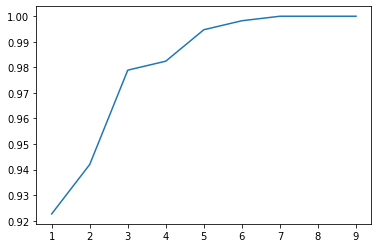

In [52]:
import matplotlib.pyplot as plt

plt.plot(range(1,10), scores)